In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Compare the RG-Drude and Mie scattering cross-sections

In [2]:
from astrodust import distlib
from astrodust.extinction import sigma_scat as ss
import astrodust.constants as c

In [3]:
NH, d2g = 1.e21, 0.009
MDUST   = NH * c.m_p * d2g 
ERANGE  = np.logspace(-0.6,1.0,20)

### Set up grain size distributions and materials

In [4]:
RHO_SIL, RHO_GRA, RHO_AVG = 3.8, 2.2, 3.0 # g cm^-3; see Draine's ISM book

In [5]:
AMIN, AMAX = 0.005, 0.25 # micron (limits on grain size distribution)
PMRN       = 3.5

In [6]:
MRN_sil   = distlib.MRN_dist(AMIN, AMAX, p=PMRN, rho=RHO_SIL, md=MDUST)
MRN_gra   = distlib.MRN_dist(AMIN, AMAX, p=PMRN, rho=RHO_GRA, md=MDUST)
MRN_avg   = distlib.MRN_dist(AMIN, AMAX, p=PMRN, rho=RHO_AVG, md=MDUST)

### Set up the three grain scattering models

The <code>ss.makeScatModel()</code> function is a short cut for producing a scattering model superclass.

This class contains a model from the <code>extinction.scatmodels</code> module and a complex index of refraction from the <code>distlib.composition.cmindex</code> module.

In [7]:
RGdrude = ss.makeScatModel('RG','Drude')
Mie_Sil = ss.makeScatModel('Mie','Silicate')
Mie_Gra = ss.makeScatModel('Mie','Graphite')

In [8]:
print(RGdrude.__dict__.keys())
print(type(RGdrude.smodel))
print(type(RGdrude.cmodel))

['cmodel', 'cmtype', 'smodel', 'stype']
<class 'astrodust.extinction.scatmodels.RGscat'>
<class 'astrodust.distlib.composition.cmindex.CmDrude'>


### Compute the scattering cross-sections

$$\kappa = \frac{1}{M_d}\ \int \sigma\ \frac{dn}{da}\ da $$

The <code>extinction.sigma_scat.KappaScat</code> object is a container for all of the previous objects.  

In future iterations of the code, I'm going to change this to a function.  There is also a long history as to why the dust mass is used.  These are things that will be simplified in future iterations of the code.

In [9]:
%%time
RGD_kappa = ss.KappaScat(E=ERANGE, dist=MRN_avg, scatm=RGdrude)

CPU times: user 7.68 ms, sys: 1.42 ms, total: 9.1 ms
Wall time: 14.1 ms


In [10]:
%%time
Sil_kappa = ss.KappaScat(E=ERANGE, dist=MRN_sil, scatm=Mie_Sil)

CPU times: user 1min 35s, sys: 188 ms, total: 1min 35s
Wall time: 1min 35s


In [11]:
%%time
Gra_kappa = ss.KappaScat(E=ERANGE, dist=MRN_gra, scatm=Mie_Gra)

CPU times: user 3min 9s, sys: 350 ms, total: 3min 9s
Wall time: 3min 9s


### Plot it

Multiply through by the dust mass to get the total opacity.

In [12]:
def plot_kappa(ax, kappa_obj, **kwargs):
    ax.plot(kappa_obj.E, kappa_obj.kappa * kappa_obj.dist.md, **kwargs)
    ax.tick_params(labelsize=12)
    ax.set_xlabel('Energy (keV)', size=14)
    ax.set_ylabel('Scattering Opacity ($\tau$ per 10$^{21}$ H cm$^{-2}$)', size=14)
    return

(0.0001, 1.0)

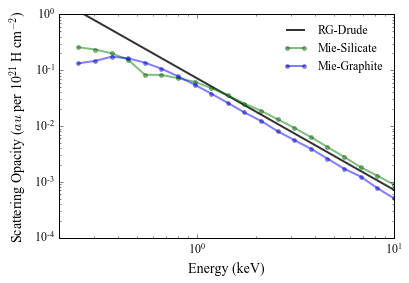

In [13]:
ax = plt.subplot(111)
plot_kappa(ax, RGD_kappa, color='k', lw=2, alpha=0.8, label='RG-Drude')
plot_kappa(ax, Sil_kappa, marker='o', color='g', lw=2, alpha=0.5, label='Mie-Silicate')
plot_kappa(ax, Gra_kappa, marker='o', color='b', lw=2, alpha=0.5, label='Mie-Graphite')
plt.legend(loc='upper right', frameon=False)
plt.loglog()
plt.xlim(0.2, 10.0)
plt.ylim(1.e-4, 1.0)